# My First Data Science Project

## Helicopter Prison Escapes: What years were they most popular and in what country

#### Wikipedia has a page decicated to prison escapes by helicopter ([List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes))

#### The wiki page contains a dataframe with information about each escape. Date, Prison name, Country, Whether they succeeded or not, the escapee, and details of the escape

#### For my first DataQuest data science project, I will be determining which year(s) were most popular for helicopter escapes. And, which country had the most escapes.
#### Spoiler alert: 1986, 2001, 2007, 2009, and France with 15 since 1971

We begin by importing some helper functions, although I will later bypass these helper functions provided by DataQuest

In [19]:
from helper import * # dataquest helper functions, which I will bypass now that I have learned more


Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [22]:
url = 'https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes'
# data = data_from_url(url) # DataQuest helper function

## to achieve this without dataquests built helper function
import pandas as pd
df = pd.read_html(url)[1]

# Dataset in project was a list of lists and not a dataframe
data = df.to_numpy().tolist()
print(data[:3])


[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired 

The 'Details' column contains a long text description of the event which we will not be addressing in this project: therefore I will exlude last column

In [23]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1
    

### Most escape attempts per year

In [24]:
print(data[:3])


[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


In [25]:
for row in data:
    # row[0] = fetch_year(row[0]) # this helper function converts mo day, year to just year
    
    row[0] = int(re.findall("\d{4}", row[0])[0])
    

Now let's count the prison escapes over all the years covered in the dataframe

In [27]:
# creating an index of all the years from min to max

min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]
years = []
for y in range(min_year, max_year + 1):
    years.append(y)
    
print(years)


[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [28]:
# creating the empty counter

attempts_per_year = []
for y in years:
    attempts_per_year.append([y,0])

print(attempts_per_year)


[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


In [29]:
for row in data:
    for ya in attempts_per_year:
        y = ya[0]
        if row[0] == y:
            ya[1] += 1 
        
print(attempts_per_year)


[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


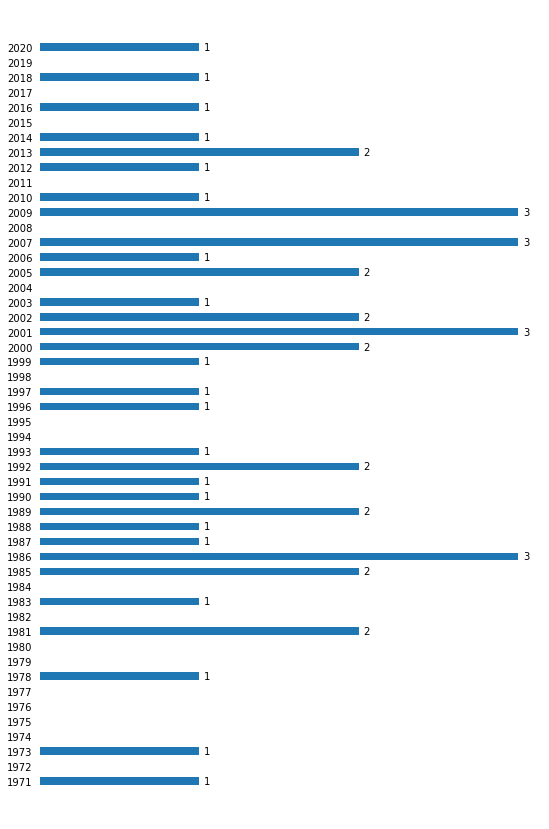

In [30]:
%matplotlib inline
barplot(attempts_per_year)


### The most prison breakout attempts by helicopter occurred in 1986, 2001, 2007, and 2009 with 3 attempts 

## Attempts by country

In [32]:
print(data[:3])


[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


In [40]:
# count escape attempts by country

esc_by_country = {}

for row in data:
    country = row[2]
    if country in esc_by_country:
        esc_by_country[country] += 1
    else:
        esc_by_country[country] = 1
print(esc_by_country)    
    

{'Mexico': 1, 'Ireland': 1, 'United States': 8, 'France': 15, 'Canada': 4, 'Australia': 2, 'Brazil': 2, 'Italy': 1, 'United Kingdom': 2, 'Puerto Rico': 1, 'Chile': 1, 'Netherlands': 1, 'Greece': 4, 'Belgium': 4, 'Russia': 1}


In [74]:
# sort attempts by country and convert to list

country_max = sorted(esc_by_country, key=lambda x:esc_by_country[x], reverse=False)
country_list = []
for country in country_max:
    country_list.append([country, esc_by_country[country]])
print(country_list)


[['Mexico', 1], ['Ireland', 1], ['Italy', 1], ['Puerto Rico', 1], ['Chile', 1], ['Netherlands', 1], ['Russia', 1], ['Australia', 2], ['Brazil', 2], ['United Kingdom', 2], ['Canada', 4], ['Greece', 4], ['Belgium', 4], ['United States', 8], ['France', 15]]


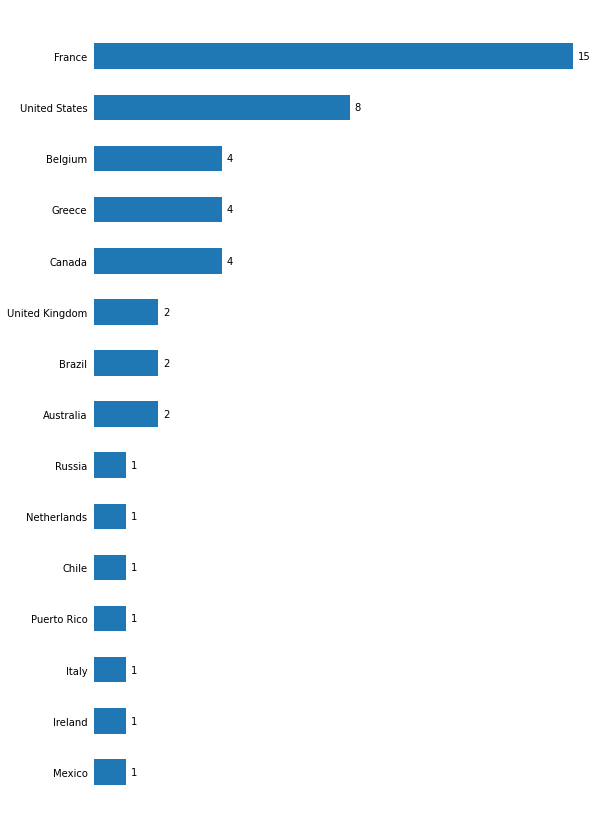

In [75]:
%matplotlib inline
barplot(country_list)


### France has the most escape attempts since 1971